# Dataset Information

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 

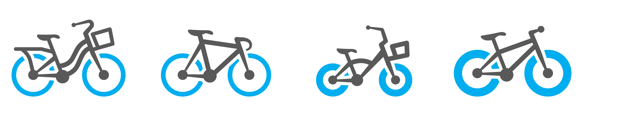

The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour, and date information.

# 1: Import Libraries

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd
from pandas import plotting

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for path
import os


# 2: Reading the Dataset


In [2]:

dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'
df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))
df.head()

The shape of the dataset is (5760, 15).




,ID,Date,y,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# 3- Explainatry Data Analysis - EDA

In [3]:
# Shape or Size
df.shape

(5760, 15)

In [4]:
#Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         5760 non-null   int64  
 1   Date                       5760 non-null   object 
 2   y                          5760 non-null   int64  
 3   Hour                       5760 non-null   int64  
 4   Temperature(�C)            5760 non-null   float64
 5   Humidity(%)                5760 non-null   int64  
 6   Wind speed (m/s)           5760 non-null   float64
 7   Visibility (10m)           5760 non-null   int64  
 8   Dew point temperature(�C)  5760 non-null   float64
 9   Solar Radiation (MJ/m2)    5760 non-null   float64
 10  Rainfall(mm)               5760 non-null   float64
 11  Snowfall (cm)              5760 non-null   float64
 12  Seasons                    5760 non-null   object 
 13  Holiday                    5760 non-null   objec

In [5]:
#Data types validation
df.dtypes
#P.S Date is in string format

ID                             int64
Date                          object
y                              int64
Hour                           int64
Temperature(�C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(�C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [6]:
#Rename the columns
df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Dew point temperature(�C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation','Visibility (10m)':'Visibility','Functioning Day':'Functioning_Day',
                       'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'},inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5760 non-null   int64  
 1   Date                   5760 non-null   object 
 2   y                      5760 non-null   int64  
 3   Hour                   5760 non-null   int64  
 4   Temperature            5760 non-null   float64
 5   Humidity               5760 non-null   int64  
 6   Wind_speed             5760 non-null   float64
 7   Visibility             5760 non-null   int64  
 8   Dew_point_temperature  5760 non-null   float64
 9   Solar_Radiation        5760 non-null   float64
 10  Rainfall               5760 non-null   float64
 11  Snowfall               5760 non-null   float64
 12  Seasons                5760 non-null   object 
 13  Holiday                5760 non-null   object 
 14  Functioning_Day        5760 non-null   object 
dtypes: f

### Checking Duplicate values

In [7]:
df[df.duplicated()].count()

ID                       0
Date                     0
y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

P.S. No duplicate values

### Handling missing values

In [8]:
#Looking out for missing values and handling them
df.isnull().sum()

ID                       0
Date                     0
y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [9]:
df.isna().sum()

ID                       0
Date                     0
y                        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [10]:
#Summary Stastics
df.drop(columns = ['ID','y']).describe() 

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall
count,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000,5760.000000
mean,11.500000,12.803559,58.361806,1.723333,1473.711458,4.058264,0.572325,0.135122,0.046302
std,6.922788,11.902206,19.840167,1.047898,585.879880,13.003582,0.869943,1.075320,0.323728
min,0.000000,-15.100000,0.000000,0.000000,27.000000,-26.900000,0.000000,0.000000,0.000000
25%,5.750000,3.200000,43.000000,0.900000,1025.750000,-5.400000,0.000000,0.000000,0.000000
50%,11.500000,13.700000,57.000000,1.500000,1732.000000,5.200000,0.010000,0.000000,0.000000
75%,17.250000,22.225000,73.000000,2.300000,2000.000000,14.700000,0.940000,0.000000,0.000000
max,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,5.100000


P.S Minimum values at the following columns are zeros ( 'Wind_speed','Solar_Radiation' , 'Rainfall' ,'Snowfall') 

In [11]:
df.head()

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
#Replacing zeros by np.nan
df_copy = df.copy()
df_copy = df_copy.loc[: , df_copy.columns.isin([ 'Wind_speed','Solar_Radiation' , 'Rainfall' ,'Snowfall' ])]
df_copy.replace(0, np.nan , inplace = True)
df_copy.isnull().sum()

Wind_speed           62
Solar_Radiation    2831
Rainfall           5428
Snowfall           5580
dtype: int64

Large Null values at columns of ('Wind_speed','Solar_Radiation' , 'Rainfall' ,'Snowfall')

In [13]:
#Fill Nullable values with mean values. Median() and Mode() can be used too.
df_copy = df_copy.fillna(df_copy.mean()) 
df_copy.isnull().sum()


Wind_speed         0
Solar_Radiation    0
Rainfall           0
Snowfall           0
dtype: int64

In [14]:
df_copy.head()

,Wind_speed,Solar_Radiation,Rainfall,Snowfall
0,2.2,1.1255,2.344277,1.481667
1,0.8,1.1255,2.344277,1.481667
2,1.0,1.1255,2.344277,1.481667
3,0.9,1.1255,2.344277,1.481667
4,2.3,1.1255,2.344277,1.481667


In [15]:
df['Wind_speed']= df_copy['Wind_speed']
df['Solar_Radiation']= df_copy['Solar_Radiation']
df['Rainfall']= df_copy['Rainfall']
df['Snowfall']= df_copy['Snowfall']
df.head()

,ID,Date,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes
1,1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes
2,2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,1.1255,2.344277,1.481667,Winter,No Holiday,Yes
3,3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes
4,4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes


### Typecasting the datetime 

In [16]:
df['Date']

0       01/12/2017
1       01/12/2017
2       01/12/2017
3       01/12/2017
4       01/12/2017
           ...    
5755    20/11/2018
5756    20/11/2018
5757    20/11/2018
5758    20/11/2018
5759    20/11/2018
Name: Date, Length: 5760, dtype: object

In [17]:

df['Date']= pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df = df.drop(columns=['Date'])
df.head()

,ID,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,year,month,day
0,0,254,0,-5.2,37,2.2,2000,-17.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes,2017,1,12
1,1,204,1,-5.5,38,0.8,2000,-17.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes,2017,1,12
2,2,173,2,-6.0,39,1.0,2000,-17.7,1.1255,2.344277,1.481667,Winter,No Holiday,Yes,2017,1,12
3,3,107,3,-6.2,40,0.9,2000,-17.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes,2017,1,12
4,4,78,4,-6.0,36,2.3,2000,-18.6,1.1255,2.344277,1.481667,Winter,No Holiday,Yes,2017,1,12


In [18]:
#check new added column datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5760 non-null   int64  
 1   y                      5760 non-null   int64  
 2   Hour                   5760 non-null   int64  
 3   Temperature            5760 non-null   float64
 4   Humidity               5760 non-null   int64  
 5   Wind_speed             5760 non-null   float64
 6   Visibility             5760 non-null   int64  
 7   Dew_point_temperature  5760 non-null   float64
 8   Solar_Radiation        5760 non-null   float64
 9   Rainfall               5760 non-null   float64
 10  Snowfall               5760 non-null   float64
 11  Seasons                5760 non-null   object 
 12  Holiday                5760 non-null   object 
 13  Functioning_Day        5760 non-null   object 
 14  year                   5760 non-null   int64  
 15  mont

In [19]:
# count the values of each column
for col in df.drop(columns=['ID','y']).columns:
    print(f'For column {col}')
    print('------------------')
    print(df[col].value_counts())
    print('\n')

For column Hour
------------------
0     240
4     240
19    240
15    240
11    240
7     240
3     240
22    240
18    240
14    240
10    240
6     240
2     240
21    240
17    240
13    240
9     240
5     240
1     240
20    240
16    240
12    240
8     240
23    240
Name: Hour, dtype: int64


For column Temperature
------------------
 19.0    30
 22.6    27
 20.2    26
 19.1    26
 18.8    26
         ..
 39.4     1
-14.1     1
 37.8     1
-10.8     1
 36.1     1
Name: Temperature, Length: 515, dtype: int64


For column Humidity
------------------
97    123
53    116
44    114
56    114
51    113
     ... 
16     10
18      9
14      8
19      7
0       1
Name: Humidity, Length: 86, dtype: int64


For column Wind_speed
------------------
1.2    276
1.1    274
1.0    255
0.8    250
0.9    246
      ... 
5.2      1
7.4      1
6.1      1
6.0      1
7.3      1
Name: Wind_speed, Length: 63, dtype: int64


For column Visibility
------------------
2000    1480
1996      22
1995      2

### Handling the Categorical values

In [20]:
df['Seasons'].value_counts()

Winter    1440
Summer    1440
Autumn    1440
Spring    1440
Name: Seasons, dtype: int64

In [21]:
df['Holiday'].value_counts()

No Holiday    5520
Holiday        240
Name: Holiday, dtype: int64

In [22]:
df['Functioning_Day'].value_counts()

Yes    5513
No      247
Name: Functioning_Day, dtype: int64

#### Type casting the datetime

In [23]:
#categorical attributes
cat_attributes=['Seasons','Holiday','Functioning_Day']
#numerical attributes
num_attributes=['Temperature','Wind_speed','Humidity','Visibility', 'Solar_Radiation','Dew_point_temperature','Hour','year','month','day']


# df['year']=df.year.astype('category')
df['Seasons']=df.Seasons.astype('category')
df['Holiday']=df.Holiday.astype('category')
df['Functioning_Day']=df.Functioning_Day.astype('category')

# 4: Dataset Visualization

In [24]:
#create correlation
corr = df.drop(columns='ID').corr(method = 'pearson')
corr

,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,year,month,day
y,1.000000,4.071798e-01,0.544281,-0.191603,0.110062,0.214777,0.392454,0.049766,-0.015906,-0.006649,2.018374e-01,7.349847e-02,1.019814e-01
Hour,0.407180,1.000000e+00,0.126636,-0.265750,0.286511,0.101892,-0.000374,-0.000505,0.012509,0.027269,4.561664e-15,4.283714e-16,3.937296e-16
Temperature,0.544281,1.266364e-01,1.000000,0.172183,-0.048727,0.041475,0.916921,0.235903,0.021155,0.009677,4.003186e-01,4.028679e-03,1.631625e-01
Humidity,-0.191603,-2.657503e-01,0.172183,1.000000,-0.348483,-0.545016,0.542925,-0.341745,0.031531,0.026097,7.610778e-02,-9.696700e-03,1.583677e-02
Wind_speed,0.110062,2.865114e-01,-0.048727,-0.348483,1.000000,0.178850,-0.185577,0.189819,0.012073,-0.077062,-3.310864e-02,-4.002776e-02,-1.330197e-01
Visibility,0.214777,1.018916e-01,0.041475,-0.545016,0.178850,1.000000,-0.165620,0.151922,-0.021799,-0.050600,-7.398984e-03,9.172633e-02,-7.263641e-02
Dew_point_temperature,0.392454,-3.742059e-04,0.916921,0.542925,-0.185577,-0.165620,1.000000,0.054172,0.027741,0.015978,3.692559e-01,6.739036e-03,1.436290e-01
Solar_Radiation,0.049766,-5.051206e-04,0.235903,-0.341745,0.189819,0.151922,0.054172,1.000000,-0.026460,-0.016908,9.571174e-02,-1.376005e-03,1.423297e-02
Rainfall,-0.015906,1.250873e-02,0.021155,0.031531,0.012073,-0.021799,0.027741,-0.026460,1.000000,0.012418,1.655610e-02,-2.853522e-02,1.502813e-02
Snowfall,-0.006649,2.726874e-02,0.009677,0.026097,-0.077062,-0.050600,0.015978,-0.016908,0.012418,1.000000,-1.529691e-01,9.273769e-02,1.315084e-01


In [25]:
#convert correlation to numpy array
mask = np.array(corr)

### Heat Map

<AxesSubplot:>

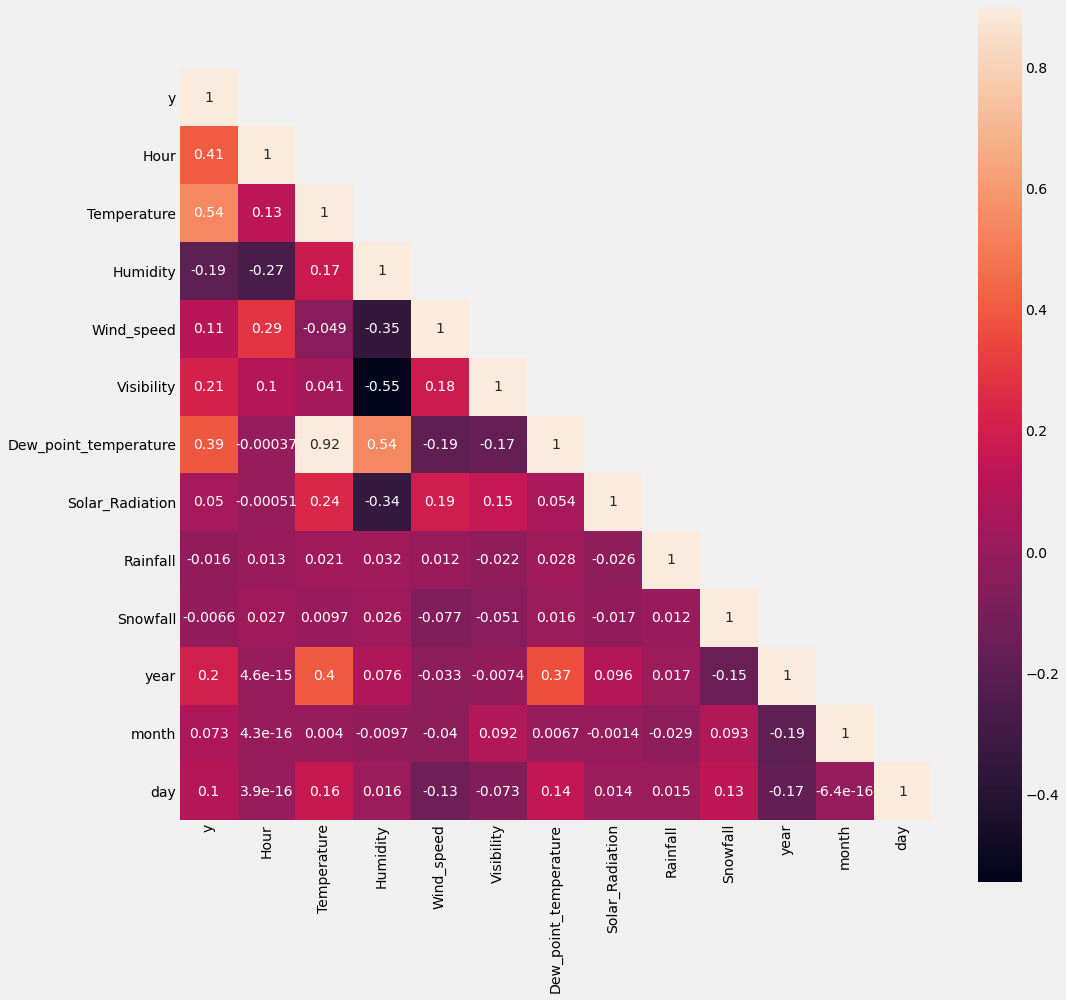

In [26]:
#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

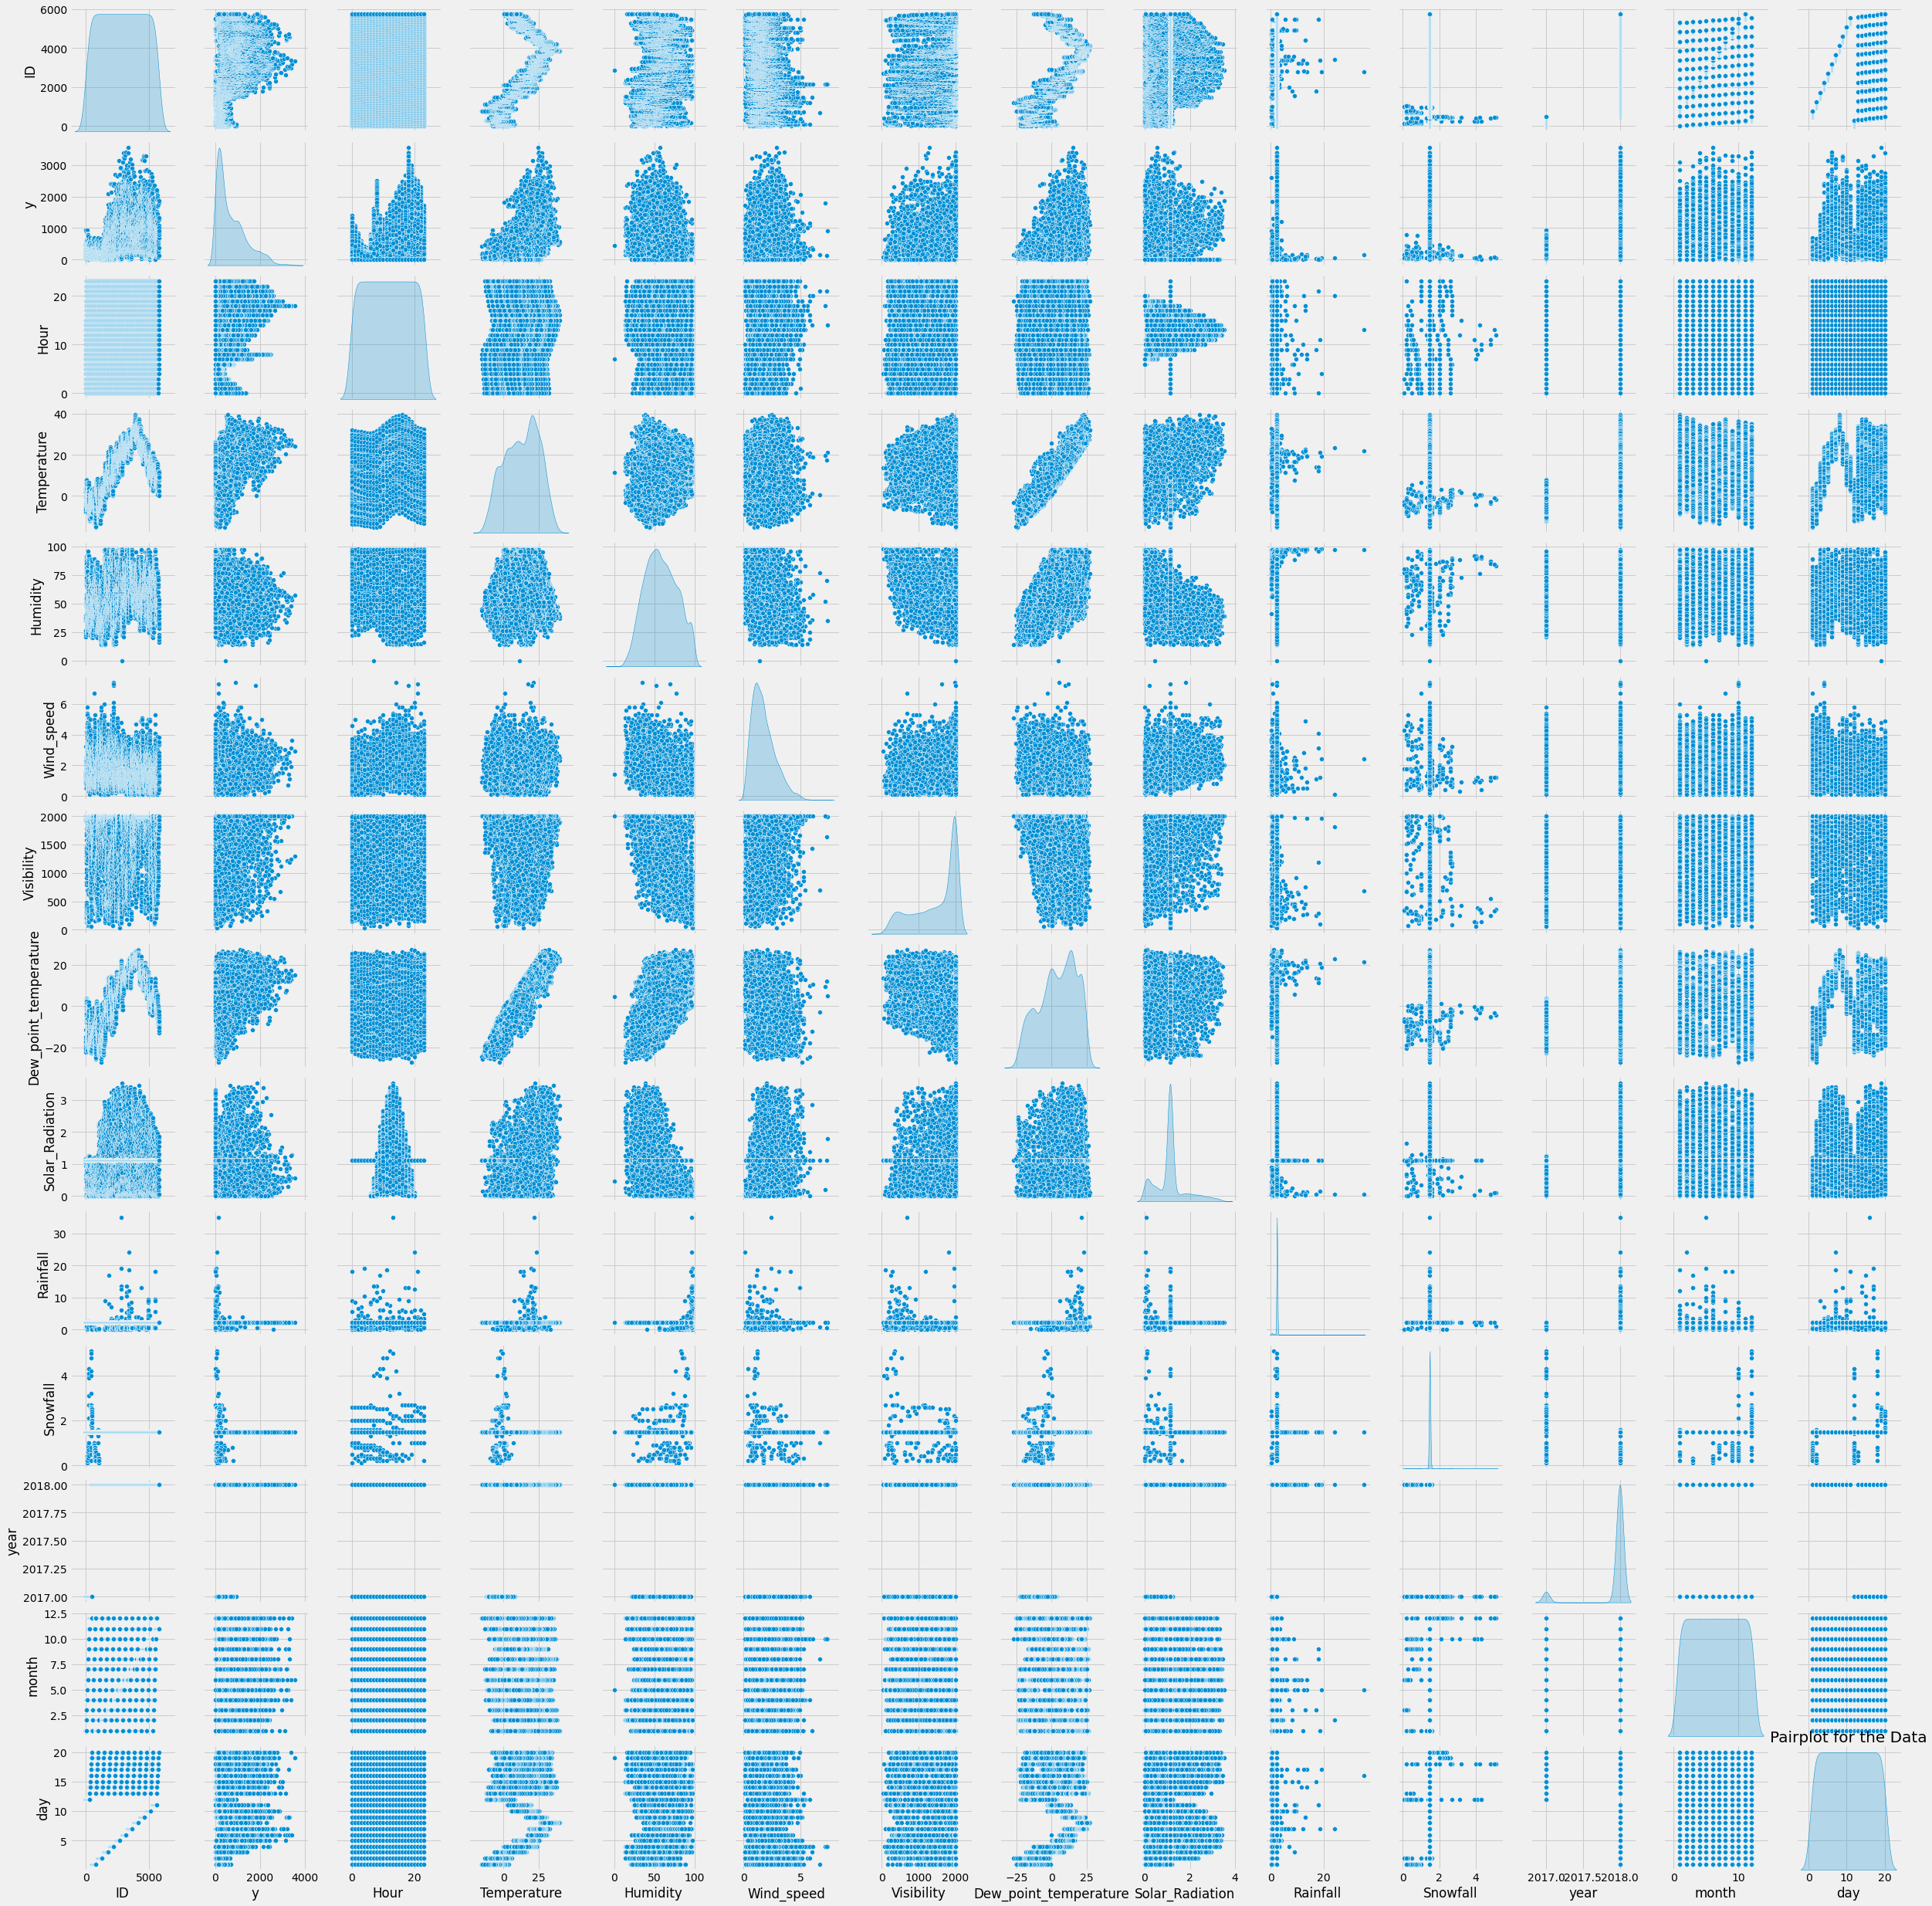

In [27]:
#Pairplot for the Data
sns.pairplot(df , diag_kind="kde")
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

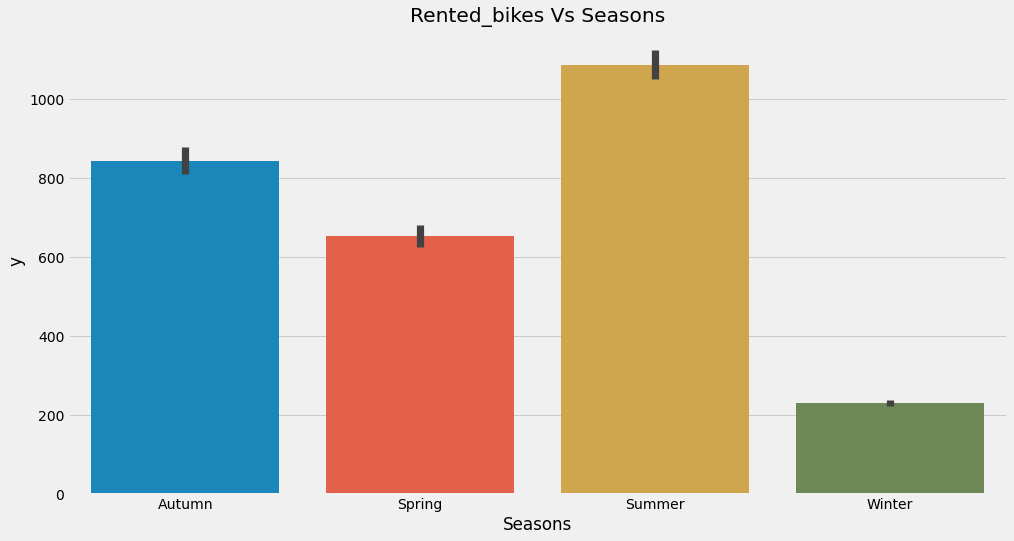

In [28]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Seasons distribution of counts
sns.barplot(data=df,x='Seasons',y='y')
ax.set_title('Rented_bikes Vs Seasons')
plt.show()

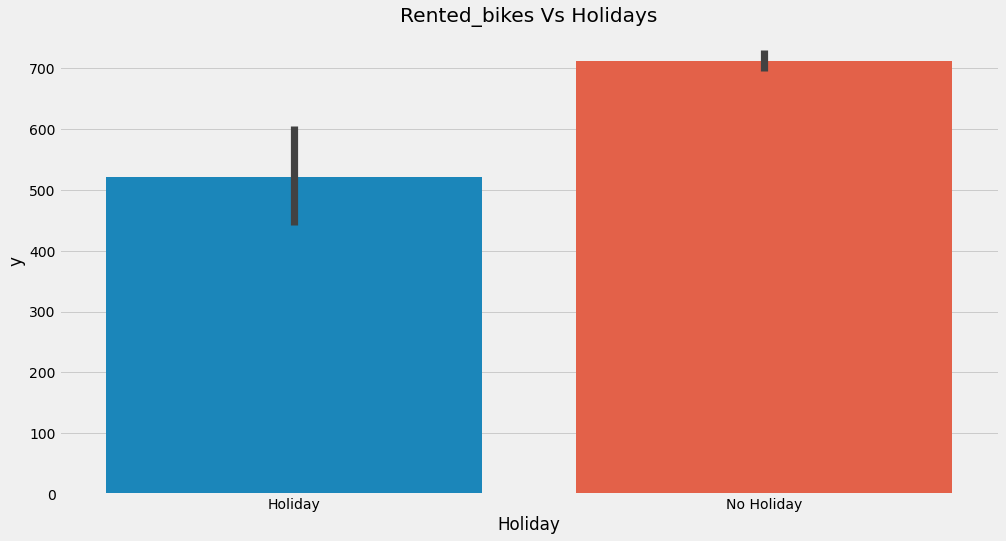

In [29]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Holidays distribution of counts
sns.barplot(data=df,x='Holiday',y='y')
ax.set_title('Rented_bikes Vs Holidays')
plt.show()

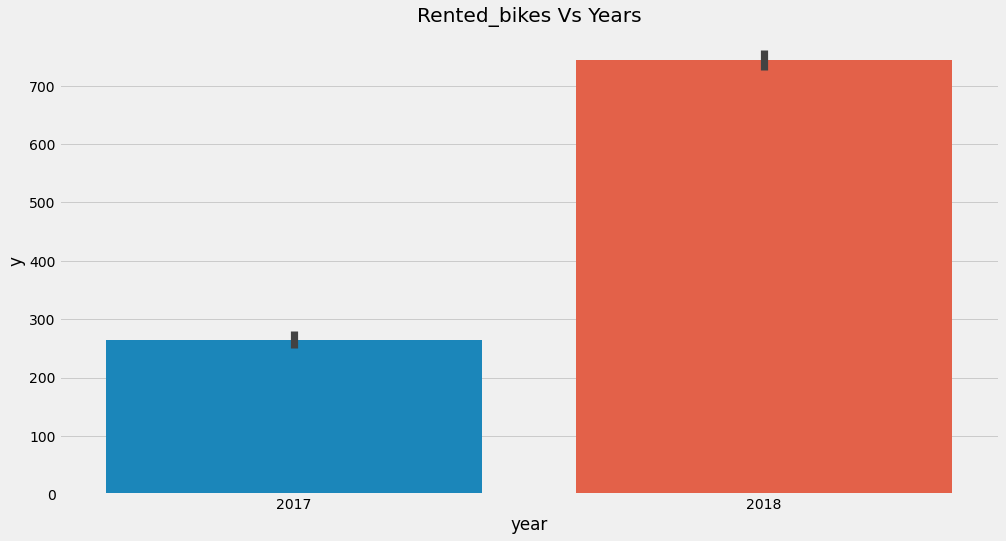

In [30]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Years distribution of counts
sns.barplot(data=df,x='year',y='y')
ax.set_title('Rented_bikes Vs Years')
plt.show()

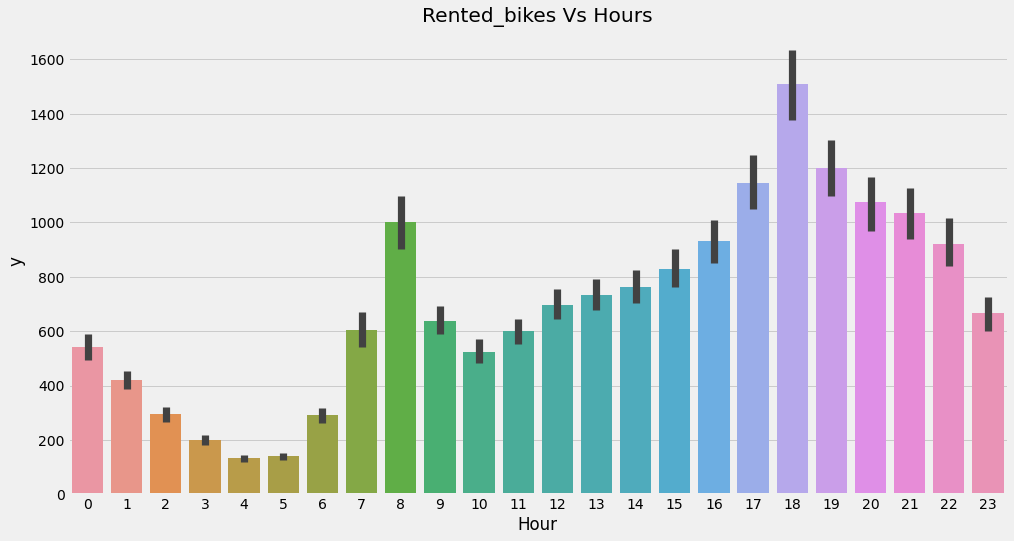

In [31]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for Hours distribution of counts
sns.barplot(data=df,x='Hour',y='y')
ax.set_title('Rented_bikes Vs Hours')
plt.show()

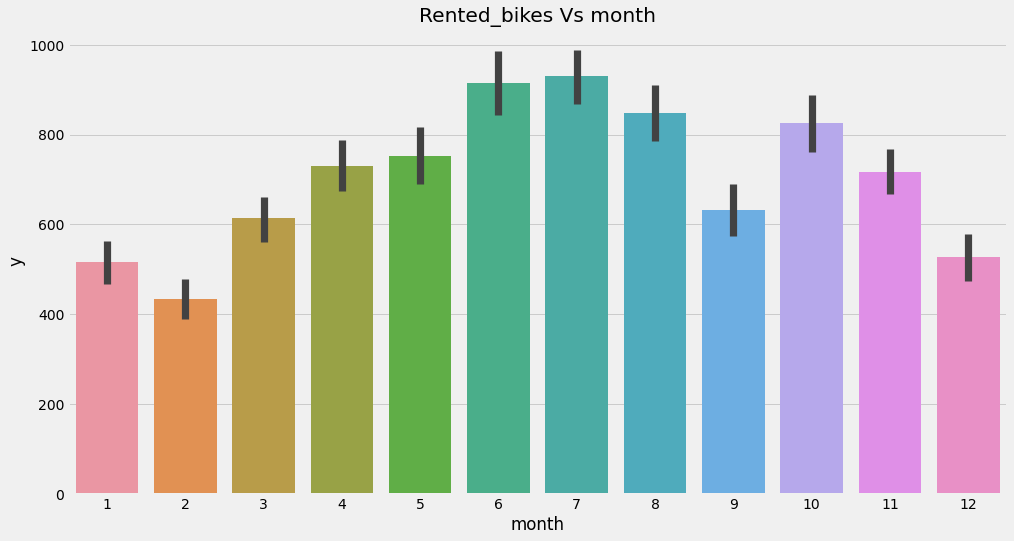

In [32]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for month distribution of counts
sns.barplot(data=df,x='month',y='y')
ax.set_title('Rented_bikes Vs month')
plt.show()

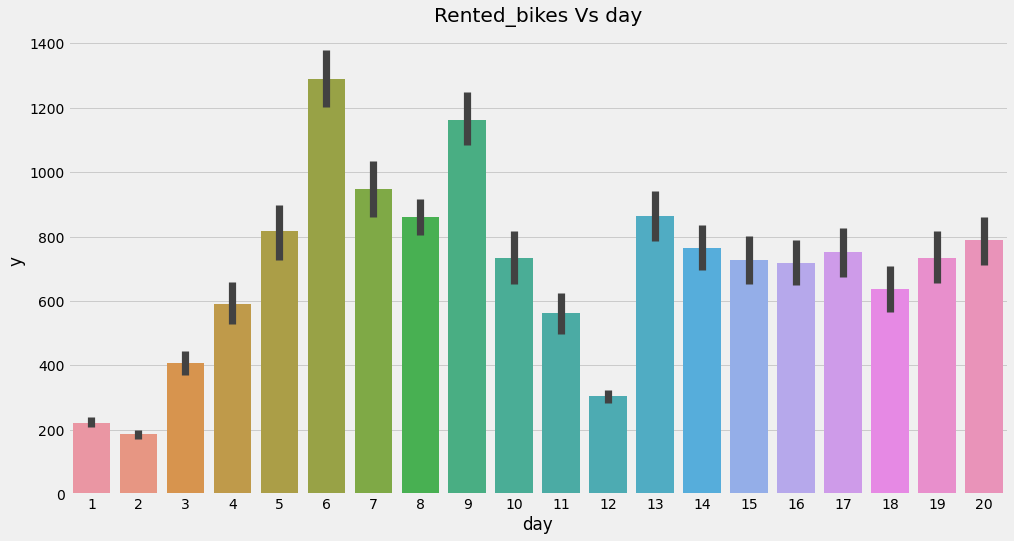

In [33]:
ig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=df,x='day',y='y')
ax.set_title('Rented_bikes Vs day')
plt.show()

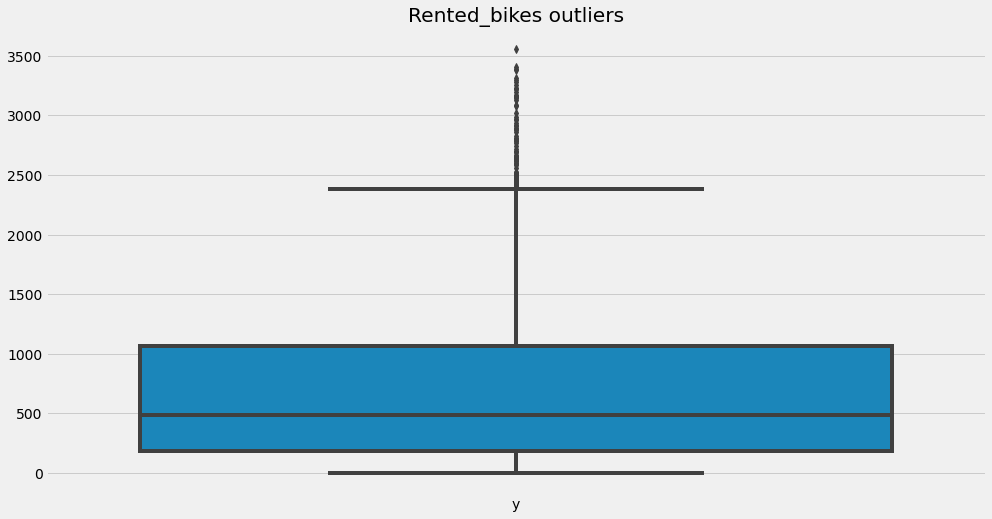

In [34]:
#Total_outliers
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=df[['y']])
ax.set_title('Rented_bikes outliers')
plt.show()

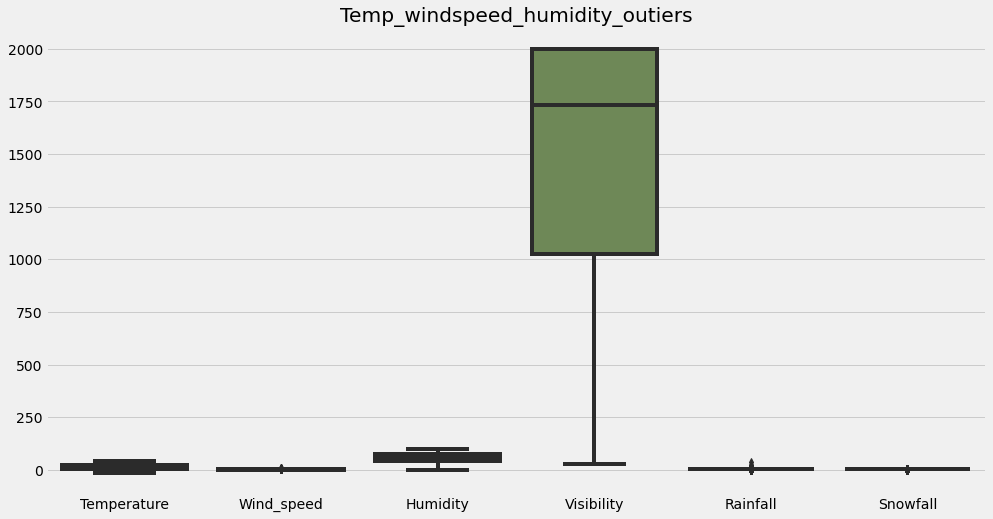

In [35]:
#Temp_windspeed_humidity_outliers
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=df[['Temperature','Wind_speed','Humidity' ,'Visibility' , 'Rainfall' , 'Snowfall' ]])
ax.set_title('Temp_windspeed_humidity_outiers')
plt.show()

# 5- Data Splitting & Model Training
Let's train a model with the data! We'll train many Classifier to demonstrate the process of making submissions.

## Encoding the categorical features

In [36]:
#To get dummy variables to encode the categorical features to numeric
encoded_pd=pd.get_dummies(df,columns=cat_attributes)
print('Shape of transfomed dataframe::',encoded_pd.shape)
encoded_pd.head()
df=encoded_pd
df.head()

#this way of encoding will increae diementions.

Shape of transfomed dataframe:: (5760, 22)


,ID,y,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,...,month,day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,0,254,0,-5.2,37,2.2,2000,-17.6,1.1255,2.344277,...,1,12,0,0,0,1,0,1,0,1
1,1,204,1,-5.5,38,0.8,2000,-17.6,1.1255,2.344277,...,1,12,0,0,0,1,0,1,0,1
2,2,173,2,-6.0,39,1.0,2000,-17.7,1.1255,2.344277,...,1,12,0,0,0,1,0,1,0,1
3,3,107,3,-6.2,40,0.9,2000,-17.6,1.1255,2.344277,...,1,12,0,0,0,1,0,1,0,1
4,4,78,4,-6.0,36,2.3,2000,-18.6,1.1255,2.344277,...,1,12,0,0,0,1,0,1,0,1


## Data Splitting

Now it's time to split the dataset for the training step. Typically the dataset is split into 3 subsets, namely, the training, validation and test sets. In our case, the test set is already predefined. So we'll split the "training" set into training and validation sets with 0.8:0.2 ratio. 


In [37]:

#load the required libraries
from sklearn import preprocessing,metrics,linear_model
from sklearn.model_selection import cross_val_score,train_test_split

#Split the dataset into the train and test data
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(df.iloc[:,2:],df.iloc[:,1],test_size=0.2, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset train index values
X_val.reset_index(inplace=True)
y_val=y_val.reset_index()

#Removing un-important features
X_train = X_train.drop(columns=['index'])
y_train = y_train.drop(columns=['index' ])

X_val = X_val.drop(columns=['index' ])
y_val = y_val.drop(columns=['index' ])

print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)


(4608, 20) (1152, 20) (4608, 1) (1152, 1)


In [38]:
X_val.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,year,month,day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes
0,14,25.6,77,0.8,1930,21.2,0.7800,2.344277,1.481667,2018,3,9,1,0,0,0,0,1,0,1
1,20,10.2,46,0.2,2000,-0.9,1.1255,2.344277,1.481667,2018,11,10,1,0,0,0,0,1,0,1
2,3,7.8,49,1.4,1972,-2.2,1.1255,2.344277,1.481667,2018,12,4,0,1,0,0,0,1,0,1
3,13,17.6,49,4.7,2000,6.7,1.8900,2.344277,1.481667,2018,1,10,1,0,0,0,0,1,0,1
4,18,11.8,43,1.3,1995,-0.3,0.0300,2.344277,1.481667,2018,1,11,1,0,0,0,0,1,0,1


In [39]:
y_val.head()

,y
0,532
1,1389
2,182
3,1087
4,2254




### Looking at the distribution of Target variable
If target variable's distribution is too skewed then the predictive modeling will not be possible.
Bell curve is desirable but slightly positive skew or negative skew is also fine
When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:>

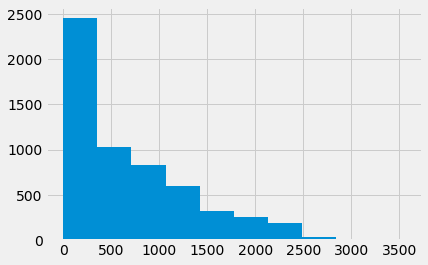

In [40]:
# Creating Bar chart as the Target variable is Continuous
df['y'].hist()

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions. 

In [41]:
#Training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)

In [42]:
#Fit the trained model
rf.fit(X_train,y_train)

#Cross validation prediction
predict=rf.predict(X_val)
print(predict.shape)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


(1152,)


In [43]:
#accuracy of the model
rf_score =rf.score(X_val,y_val)
print('Accuracy of the model :',rf_score)

Accuracy of the model : 0.8704011583865061


### cross validation prediction plot
Cross validation prediction plot tells about finite variance between actual target value and predicted target value. In this plot, some data points are have same finite variance between them and for some are not have it.

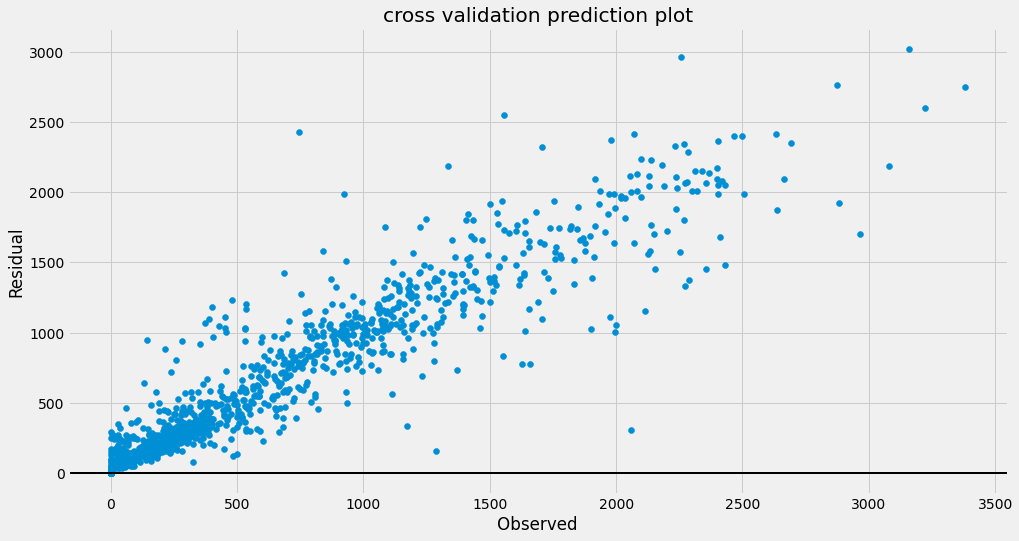

In [44]:
fig,ax=plt.subplots(figsize=(15,8))
ax.scatter(y_val,predict)
ax.axhline(lw=2,color='black')
ax.set_title('cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

## RMSLE 

Root Mean Squared Logarithmic Error (RMSLE) is the metric used for the ASHRAE Energy Prediction competition and a common metric for regression problems. It is an extension on Mean Squared Error (MSE) that is mainly used when predictions have large deviations.

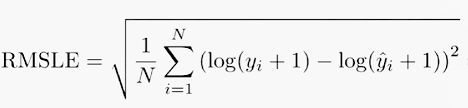

In [45]:

from sklearn.metrics import mean_squared_log_error 
print ('RMSLE:' + str(np.sqrt(mean_squared_log_error ( predict , y_val) )))

RMSLE:0.7435166733484639


## Submission File Generation

We have built a model and we'd like to submit our predictions on the test set! In order to do that, we'll load the test set, predict the class and save the submission file. 

First, we'll load the data.

In [46]:
dataset_path = '/kaggle/input/seoul-bike-rental-ai-pro-iti/'
test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
print("The shape of the dataset is {}.\n\n".format(df.shape))
test_df.head()

The shape of the dataset is (5760, 22).




,ID,Date,Hour,Temperature(�C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(�C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,5760,21/12/2017,0,-1.3,90,2.0,259,-2.7,0.0,0.0,2.2,Winter,No Holiday,Yes
1,5761,21/12/2017,1,-1.8,90,1.6,263,-3.2,0.0,0.0,2.2,Winter,No Holiday,Yes
2,5762,21/12/2017,2,-2.2,88,1.4,348,-3.9,0.0,0.0,2.2,Winter,No Holiday,Yes
3,5763,21/12/2017,3,-2.9,89,1.3,288,-4.4,0.0,0.0,2.2,Winter,No Holiday,Yes
4,5764,21/12/2017,4,-3.6,91,1.2,241,-4.8,0.0,0.0,2.2,Winter,No Holiday,Yes


Note that the test set has the same features and doesn't have the `y` column.
At this stage one must **NOT** forget to apply the same processing done on the training set on the features of the test set.

Now we'll add `y` column to the test `DataFrame` and add the values of the predicted class to it.


In [47]:

#Rename the columns
test_df.rename(columns={'Temperature(�C)':'Temperature','Humidity(%)':'Humidity','Wind speed (m/s)':'Wind_speed','Dew point temperature(�C)':'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)':'Solar_Radiation','Visibility (10m)':'Visibility','Functioning Day':'Functioning_Day',
                       'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall'},inplace=True)



In [48]:

#Replacing zeros by np.nan
test_df_copy = test_df.copy()
test_df_copy = test_df_copy.loc[: , test_df_copy.columns.isin([ 'Wind_speed','Solar_Radiation' , 'Rainfall' ,'Snowfall' ])]
test_df_copy.replace(0, np.nan , inplace = True)
test_df_copy.isnull().sum()

#Fill Nullable values with mean values. Median() and Mode() can be used too.
test_df_copy = test_df_copy.fillna(test_df_copy.mean()) 
test_df_copy.isnull().sum()

test_df['Seasons']=test_df.Seasons.astype('category')
test_df['Holiday']=test_df.Holiday.astype('category')
test_df['Functioning_Day']=test_df.Functioning_Day.astype('category')

test_df['Wind_speed']= test_df_copy['Wind_speed']
test_df['Solar_Radiation']=test_df_copy['Solar_Radiation']
test_df['Rainfall']= test_df_copy['Rainfall']
test_df['Snowfall']= test_df_copy['Snowfall']

In [49]:
#Type casting the datetime and numerical attributes to category
test_df['Date']= pd.to_datetime(test_df['Date'])
test_df['year'] = test_df['Date'].dt.year
test_df['month'] = test_df['Date'].dt.month
test_df['day'] = test_df['Date'].dt.day
test_df = test_df.drop(columns=['Date'])

In [50]:
#categorical attributes
cat_attributes=['Seasons','Holiday','Functioning_Day']
#numerical attributes
num_attributes=['Temperature','Wind_speed','Humidity','Visibility', 'Solar_Radiation','Dew_point_temperature','Hour','year','month','day']

#To get dummy variables to encode the categorical features to numeric
encoded_pd=pd.get_dummies(test_df,columns=cat_attributes)
test_df=encoded_pd

## Model Prediction

In [51]:
#predict the model
y_test_predicted = rf.predict(test_df.drop(columns =['ID']))
test_df['y'] = y_test_predicted
test_df

,ID,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,...,day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_Day_No,Functioning_Day_Yes,y
0,5760,0,-1.3,90,2.0,259,-2.7,1.103083,2.67449,2.200000,...,21,0,0,0,1,0,1,0,1,198.610
1,5761,1,-1.8,90,1.6,263,-3.2,1.103083,2.67449,2.200000,...,21,0,0,0,1,0,1,0,1,201.680
2,5762,2,-2.2,88,1.4,348,-3.9,1.103083,2.67449,2.200000,...,21,0,0,0,1,0,1,0,1,148.600
3,5763,3,-2.9,89,1.3,288,-4.4,1.103083,2.67449,2.200000,...,21,0,0,0,1,0,1,0,1,103.455
4,5764,4,-3.6,91,1.2,241,-4.8,1.103083,2.67449,2.200000,...,21,0,0,0,1,0,1,0,1,58.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,8755,19,4.2,34,2.6,1894,-10.3,1.103083,2.67449,1.486312,...,30,1,0,0,0,0,1,0,1,827.425
2996,8756,20,3.4,37,2.3,2000,-9.9,1.103083,2.67449,1.486312,...,30,1,0,0,0,0,1,0,1,890.800
2997,8757,21,2.6,39,0.3,1968,-9.9,1.103083,2.67449,1.486312,...,30,1,0,0,0,0,1,0,1,865.205
2998,8758,22,2.1,41,1.0,1859,-9.8,1.103083,2.67449,1.486312,...,30,1,0,0,0,0,1,0,1,808.580


Now we're ready to generate the submission file. The submission file needs the columns ID and y only.

In [52]:
test_df[['ID', 'y']].to_csv('/kaggle/working/submission.csv', index=False)


The remaining steps is to submit the generated file and are as follows. 

1. Press `Save Version` on the upper right corner of this notebook.
2. Write a `Version Name` of your choice and choose `Save & Run All (Commit)` then click `Save`.
3. Wait for the saved notebook to finish running the go to the saved notebook.
4. Scroll down until you see the output files then select the `submission.csv` file and click `Submit`.